# Disease Simulation by the Monte Carlo method
In this notebook the simulation algorithm described in the chapter 2.4 is impelmented. The disease simulation is performed 1000 times for the contact list from the data set. Then the obtained list is saved. <br>
The below code is the optimized version that aims to shorten the performance time.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics

In [7]:
data=open("C:/Users/wojci/Documents/Studia/praca/DANE/dane.txt","r")
data=data.readlines()
contacts=[]
nodes=[]
times=[]
#OBRÓBKA DANYCH
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    nodes.append(int(row[1]))
    nodes.append(int(row[2]))
    times.append(int(row[0])/60/60/24)
nodes=set(nodes)
nodes=list(nodes)  #tak otrzymuję wszystkie wierzchołki jakie są w sieci podczas całego badania

for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    contacts.append((int(row[0])//60/60/24,int(row[1]),int(row[2]))) #i teraz kontakty mamy w postaci (czas, node1,node2)

In [13]:
G1000=nx.Graph(time=0,S=92)
inf_prob=0.006
incubation_period=1
infectious_period=7

for i in nodes:
    G1000.add_node(i,Id=i,state="S",time_of_inf=False)

In [14]:
def clear_net():
    for i in G1000.nodes:
        G1000.nodes[i]['state']="S"
        G1000.nodes[i]['time_of_inf']=False
    G1000.graph['time']=0
    G1000.graph['S']=92

In [15]:
def new_exposed(node,time):
    G1000.graph['S']-=1
    G1000.nodes[node]['state']='E'
    G1000.nodes[node]['time_of_inf']=time

In [16]:
def end_of_inc(i):
    
    if G1000.nodes[i]['time_of_inf']+incubation_period<=G1000.graph['time']:
        G1000.nodes[i]['state']="I"
            
def passing_to_recover(i):
    
    if G1000.nodes[i]['time_of_inf']+incubation_period+infectious_period<=G1000.graph['time']:
            G1000.nodes[i]['state']="R"
            G1000.nodes[i]['time_of_inf']=False
            
decision_dict={'E':end_of_inc,'I':passing_to_recover}
 
def transformations(): #te funkcje to modyfikacje żeby szybciej szło
    
    for i in G1000.nodes:
        try:
            func=decision_dict[G1000.nodes[i]['state']]
            func(i)
        except KeyError:
            pass

In [17]:
def IS(node1,node2,time):
    pr=random.random() 
    if pr<=inf_prob: #udało się zarazić
        new_exposed(node2,time)
        
def SI(node1,node2,time):
    pr=random.random() 
    if pr<=inf_prob: #udało się zarazić
        new_exposed(node1,time)
        
decision_dict2={'IS':IS,'SI':SI}
        
def new_contact(node1,node2,time):
    try:
        func=decision_dict2[G1000.nodes[node1]['state']+G1000.nodes[node2]['state']] 
        func(node1,node2,time)
    except KeyError:
            pass

In [18]:
def simple_epidemics(node): #used for MC simulation
    clear_net()
    new_exposed(node,0)
    for i in contacts:
        G1000.graph['time']=i[0]
        transformations()
        new_contact(i[1],i[2],i[0])
    return G1000.graph['S']

In [27]:
def monte_carlo():
    N=1000
    S=[92-simple_epidemics(random.choice(nodes)) for j in range(N)]
    #chance_for_node=[i for i in S if i>=3]
    #chance=len(chance_for_node)/N
    #mean=statistics.mean(S)
    #return [node,chance,mean]
    return S

#a=[monte_carlo(i) for i in G1000.nodes]

In [36]:
S_normal2=monte_carlo()
%store S_normal2

Stored 'S_normal2' (list)


In [2]:
import matplotlib.pyplot as plt

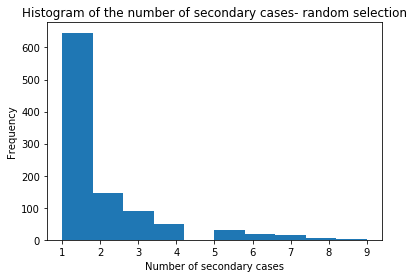

In [3]:
%store -r S_normal2
plt.hist(S_normal2)
plt.ylabel('Frequency')
plt.xlabel('Number of secondary cases')
plt.title('Histogram of the number of secondary cases- random selection')
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/random_selection/random_selection.eps")
plt.show()

(array([646., 145.,  89.,  49.,   0.,  31.,  17.,  14.,   6.,   3.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

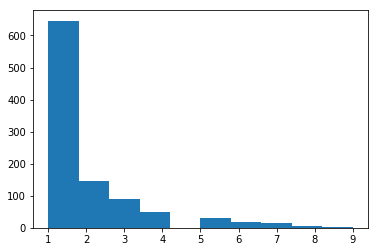

In [45]:
plt.hist(S_normal2)